In [1]:
from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import os
import pickle
import pandas as pd
from sklearn.utils import resample
from Functions import *


pd.options.display.max_rows = 35 
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('data/TweetsOriginal.csv', encoding = 'ISO-8859-1')
x_train, x_test, y_train, y_test = clean_split(df)
print(x_train.shape, x_test.shape) 
print(y_train.shape, y_test.shape)

Original Value Counts
1.0    2978
0.0     570
Name: Emotion_New, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Final Resampled Value Counts
1.0    600
0.0    570
Name: Emotion_New, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
(994, 652) (176, 652)
(994,) (176,)


### Test 1

In [3]:
models = {'Log': LogisticRegression(), 'Knn': KNeighborsClassifier(), 'DT': DecisionTreeClassifier(random_state = 10), 
          'Gaussian': GaussianNB(), 'LDA': LinearDiscriminantAnalysis(),
          'LinearSVC': LinearSVC(max_iter = 1250, random_state = 10), 'SDGSVC': SGDClassifier(random_state = 10),  
          'ADA': AdaBoostClassifier(random_state = 10), 'Bagging': BaggingClassifier(random_state = 10), 
          'Ridge': RidgeClassifier(random_state = 10), 'RF': RandomForestClassifier(random_state = 10)}

#create stacked model
new_models = stacked_model(models)

# getting results and model
result_dict = test_models(x_train, y_train, new_models, n_jobs = -1)

save_cv_results(result_dict, 'models/VanillaResults1.p')

Evaluating STACKED: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [02:33<00:00, 12.79s/it]


'Done'

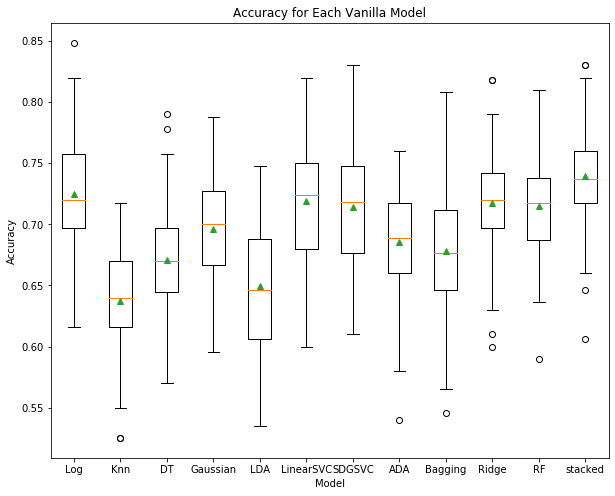

In [4]:
results = [i[1] for i in result_dict.items()]
model_names = [i for i in result_dict.keys()]
plot_model_results(results, model_names, 'figures/VanillaResults1', figsize = (10, 8))


### Test 2

In [5]:
models = {'Log': LogisticRegression(), 'Gaussian': GaussianNB(), 
          'LinearSVC': LinearSVC(max_iter = 1250, random_state = 10), 'SDGSVC': SGDClassifier(random_state = 10),  
          'Ridge': RidgeClassifier(random_state = 10), 'RF': RandomForestClassifier(random_state = 10)}

#create stacked model
new_models = stacked_model(models)

# getting results and model
result_dict = test_models(x_train, y_train, new_models, n_jobs = -1)

save_cv_results(result_dict, 'models/VanillaResults2.p')

Evaluating STACKED: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:38<00:00,  5.57s/it]


'Done'

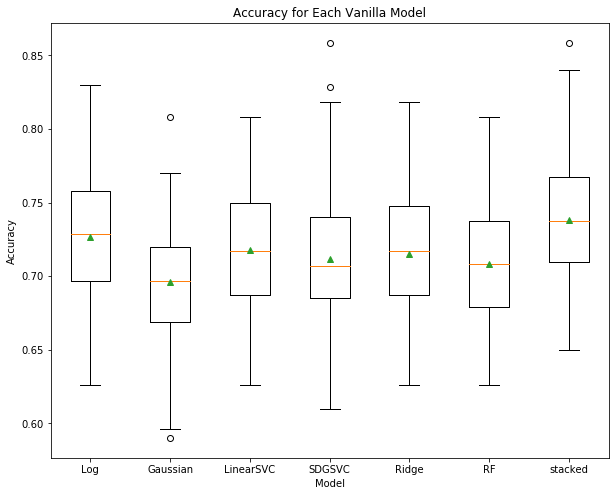

In [6]:
results = [i[1] for i in result_dict.items()]
model_names = [i for i in result_dict.keys()]
plot_model_results(results, model_names, 'figures/VanillaResults2', figsize = (10, 8))

In [ ]:
assert False

### Logistic Regression

In [7]:
vanilla_log = LogisticRegression()
vanilla_log.fit(x_train, y_train) 

print(f'Vanilla Train: {vanilla_log.score(x_train, y_train)}')
print(f'Vanilla Test: {vanilla_log.score(x_test, y_test)}')

Vanilla Train: 0.9235412474849095
Vanilla Test: 0.8011363636363636


In [ ]:

param_grid = { 
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'dual': [True, False],
    'tol': [1e-3, 1e-4, 1e-5],
    'C': [.5, 1],
    'intercept_scaling': [.5, 1, 1.5],
    'class_weight': ['balanced', None],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000],
    'l1_ratio': [None, .5],
}

log_cv = run_gridsearch(LogisticRegression(), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1, verbose = 2)
pickle.dump(log_cv, open('../Pickles/Grid_Logistic.p', 'wb'))

Fitting 5 folds for each of 5760 candidates, totalling 28800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 4672 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 5280 tasks      | elapsed:   49.1s


## Gaussian

In [ ]:
vanilla_gaus = GaussianNB()
vanilla_gaus.fit(x_train, y_train) 

print(f'Vanilla Train: {vanilla_gaus.score(x_train, y_train)}')
print(f'Vanilla Test: {vanilla_gaus.score(x_test, y_test)}')

In [ ]:
param_grid ={
    'var_smoothing': [1e-7, 1e-8, 1e-9, 1e-10, 1e-11]
}
gaus_cv = run_gridsearch(GaussianNB(), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1, verbose = 2)
pickle.dump(gaus_cv, open('../Pickles/Grid_Gaussian.p', 'wb'))

### SGDSVC

In [ ]:
vanilla_sgd = SGDClassifier(random_state = 10)
vanilla_sgd.fit(x_train, y_train)

print(f'Vanilla Train: {vanilla_sgd.score(x_train, y_train)}')
print(f'Vanilla Test: {vanilla_sgd.score(x_test, y_test)}')

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'], 
    'loss': ['hinge', 'squared_hinge'],
    'dual': [True, False],
    'tol': [1e-3, 1e-4, 1e-5],
    'C': [.5, 1.0, 1.5],
    'intercept_scaling': [.5, 1, 1.5],
    'max_iter': [1000, 2000]
}

cgd_cv = run_gridsearch(SGDClassifier(random_state = 10), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1,
                        verbose = 2)
pickle.dump(cgd_cv, open('../Pickles/Grid_SVC.p', 'wb'))

### LinearSVC

In [ ]:
vanilla_svc = LinearSVC(random_state = 10)
vanilla_svc.fit(x_train, y_train)

print(f'Vanilla Train: {vanilla_svc.score(x_train, y_train)}')
print(f'Vanilla Test: {vanilla_svc.score(x_test, y_test)}')

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'], 
    'loss': ['hinge', 'squared_hinge', 'log', 'modified_huber', 'perceptron'],
    'alpha': [.001, .0001, .00001],
    'l1_ratio': [.01, .15, .5], 
    'max_iter': [1000, 2000], 
    'tol': [1e-2, 1e-3, 1e-4],
    'shuffle': [True, False],
    'epsilon': [.05, .1, .5],
    'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'], 
    'power_t': [.1, .5, 1], 
    'n_iter_no_change': [5,10],
    'average': [True, False]
    
}
svc_cv = run_gridsearch(LinearSVC(random_state = 10), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1,
                        verbose = 2)
pickle.dump(svc_cv, open('../Pickles/Grid_SVC.p', 'wb'))

### Ridge Classifier

In [ ]:
vanilla_ridge = RidgeClassifier(random_state = 10)
vanilla_ridge.fit(x_train, y_train)

print(f'Vanilla Train: {vanilla_ridge.score(x_train, y_train)}')
print(f'Vanilla Test: {vanilla_ridge.score(x_test, y_test)}')

In [ ]:
param_grid = {
    'alpha': [.5, 1.0, 1.5], 
    'normalize': [True, False], 
    'tol': [1e-2, 1e-3, 1e-4], 
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], 
    
}
ridge_cv = run_gridsearch(RidgeClassifier(random_state = 10), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1,
                        verbose = 2)
pickle.dump(ridge_cv, open('../Pickles/Grid_Ridge.p', 'wb'))

### Random Forest

In [ ]:
vanilla_rf = RandomForestClassifier(random_state = 10)
vanilla_rf.fit(x_train, y_train)

print(f'Vanilla Train: {vanilla_rf.score(x_train, y_train)}')
print(f'Vanilla Test: {vanilla_rf.score(x_test, y_test)}')

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150], 
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 100, 200, 500],
    'min_samples_split': [2, 3, 5], 
    'min_samples_leaf': [1,2,5],
    'max_features': ['auto', 'sqrt', 'log2']
    'max_leaf_nodes': [None, 100, 200],
    'bootstrap': [True, False], 
    'class_weight': [None, 'balanced', 'balanced_subsample']
    'ccp_alpha': [0.0, .5, 1.0]

    
    
}
rf_cv = run_gridsearch(RandomForestClassifier(random_state = 10), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1,
                        verbose = 2)
pickle.dump(rf_cv, open('../Pickles/Grid_RF.p', 'wb'))

In [ ]:
assert False

In [ ]:
log = LogisticRegression()
log.fit(x_train, y_train) 

print(f'Vanilla Train: {log.score(x_train, y_train)}')
print(f'Vanilla Test: {log.score(x_test, y_test)}')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')



ridge = RidgeClassifier(random_state = 10)
ridge.fit(x_train, y_train) 

print(f'Vanilla Train: {ridge.score(x_train, y_train)}')
print(f'Vanilla Test: {ridge.score(x_test, y_test)}')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')


rf = RandomForestClassifier(random_state = 10, n_jobs = -1)
rf.fit(x_train, y_train) 

print(f'Vanilla Train: {rf.score(x_train, y_train)}')
print(f'Vanilla Test: {rf.score(x_test, y_test)}')

In [ ]:
vectorizer = pickle.load(open('../Pickles/Vectorizer.p', 'rb'))

rand_sent = 'i love apple'

new_sent = vectorizer.transform([rand_sent]).toarray()

log.predict_proba(new_sent)